Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.


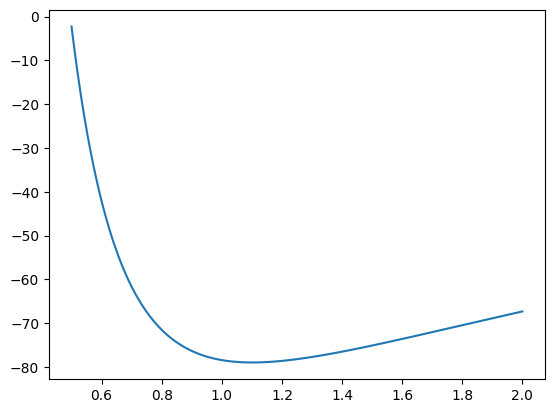

In [1]:
from main import *